In [56]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from datetime import datetime, timedelta

import const
import reference
import data
import correlation
import analysis

In [53]:
year = 2022
month = 1
day = 1

print("monstein:\n",reference.referenceMonstein2orMore(year, month, day))
print("swpc:\n",reference.referenceSWPC(year,month,day))

monstein:
 [['III', 13:42:00, 13:45:00, '1.0000']]
swpc:
 [['III/1', 04:53:00, 04:53:00, '1.0000'], ['III/3', 13:42:00, 13:43:00, '1.0000']]


In [2]:
data_file = "2022_01_unsearched_60_obs++"

In [7]:
with open(const.path_data + data_file, "rb") as read_file:
    loaded_data = pickle.load(read_file)

In [41]:
def testPeak(dp1: data.DataPoint, dp2: data.DataPoint):
    dp1.createSummedCurve([45,81])
    dp2.createSummedCurve([45,81])
    dp1.flattenSummedCurve()
    dp2.flattenSummedCurve()
    plt.figure(figsize=(12,8))
    plt.xlabel("time stamps")
    plt.ylabel("Summed Intensity")
    x1 = np.array(dp1.summedCurve)
    lim1 = 3 * np.nanstd(x1)
    scipy_peaks1 = find_peaks(x1, height=lim1)[0]
    plt.plot(x1, color="red", label=f"{dp1.observatory}")
    plt.plot(scipy_peaks1, x1[scipy_peaks1], "x", color="red")

    plt.xlabel("time stamps")
    plt.ylabel("Summed Intensity")
    x2 = np.array(dp2.summedCurve)
    lim2 = 3 * np.nanstd(x2)
    scipy_peaks2 = find_peaks(x2, height=lim2)[0]
    plt.plot(x2, color="blue", label=f"{dp2.observatory}")
    plt.plot(scipy_peaks2, x2[scipy_peaks2], "x", color="blue")

    plt.legend(loc="upper left")
    plt.show()

    new = [scipy_peaks1[0]]
    for kk in scipy_peaks1:
        if all(np.around(kk - new,-2)):
            new.append(kk)

    new2 = [scipy_peaks2[0]]
    for kk in scipy_peaks2:
        if all(np.around(kk - new2,-2)):
            new2.append(kk)

    new3 = []
    for kk in new:
        if any(np.around(kk - new2,-2) == False):
            new3.append(kk)
    print(new3)
    for i in new3:
        print(datetime.fromtimestamp(dp1.spectrum_data.start.timestamp() + i/4).strftime("%Y %m %d %H:%M:%S"))

In [54]:
def testPeakPlotless(dp1: data.DataPoint, dp2: data.DataPoint):
    dp1.createSummedCurve([45,81])
    dp2.createSummedCurve([45,81])
    dp1.flattenSummedCurve()
    dp2.flattenSummedCurve()
    x1 = np.array(dp1.summedCurve)
    lim1 = 3 * np.nanstd(x1)
    scipy_peaks1 = find_peaks(x1, height=lim1)[0]

    x2 = np.array(dp2.summedCurve)
    lim2 = 3 * np.nanstd(x2)
    scipy_peaks2 = find_peaks(x2, height=lim2)[0]

    new = [scipy_peaks1[0]]
    for kk in scipy_peaks1:
        if all(np.around(kk - new,-2)):
            new.append(kk)

    new2 = [scipy_peaks2[0]]
    for kk in scipy_peaks2:
        if all(np.around(kk - new2,-2)):
            new2.append(kk)

    new3 = []
    for kk in new:
        if any(np.around(kk - new2,-2) == False):
            new3.append(kk)
    print(new3)
    for i in new3:
        print(datetime.fromtimestamp(dp1.spectrum_data.start.timestamp() + i/4).strftime("%Y %m %d %H:%M:%S"))

In [57]:
def testAll(peak: analysis.Event):
    dp = data.createFromTime(year, month, day, str(peak.time_start), peak.stations[0], [45,81])
    do = data.createFromTime(year, month, day, str(peak.time_start), peak.stations[1], [45,81])

    print(peak.time_start, peak.probability, f"({len(peak.stations)})")
    testPeakPlotless(dp, do)
    cor = correlation.Correlation(dp, do, day, _no_background=True, _flatten=True, 
                                _bin_time=True, _bin_time_width=4, _flatten_window=400)
    cor.calculatePeaks(_limit=.6)
    print(cor.peaks)

In [61]:
for i in loaded_data[0]:
    testAll(i)

03:25:40 0.6981354084906874 (2)
[2250]
2022 01 01 03:24:34
[['III', 03:29:11, 03:29:11, '0.6034']]
04:45:49 0.6628629169228655 (2)
[495, 1903]
2022 01 01 04:47:15
2022 01 01 04:53:07
[]
07:26:42 0.6213945354604772 (2)
[649, 2312, 3291]
2022 01 01 07:17:54
2022 01 01 07:24:50
2022 01 01 07:28:55
[]
10:03:26 0.6084286336130919 (2)
[312, 390, 1025, 3084, 3213]
2022 01 01 10:01:18
2022 01 01 10:01:38
2022 01 01 10:04:17
2022 01 01 10:12:51
2022 01 01 10:13:24
[]
12:35:26 0.6666773661407159 (2)


IndexError: index 0 is out of bounds for axis 0 with size 0

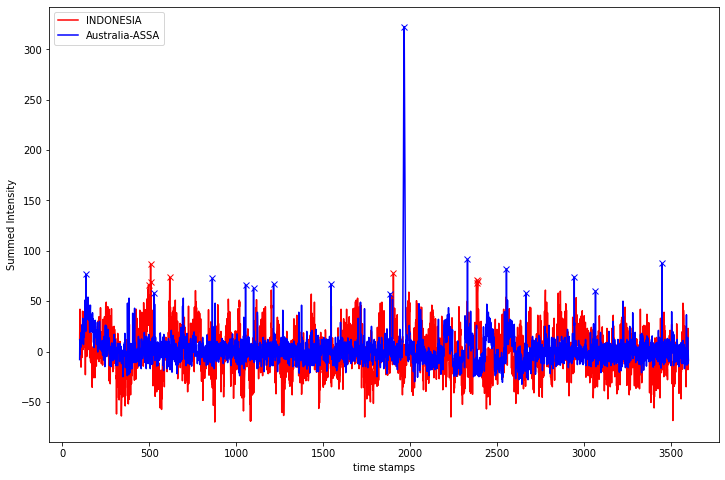

[495, 1903]
2022 01 01 04:47:15
2022 01 01 04:53:07


In [65]:
peak = loaded_data[0][1]
dp = data.createFromTime(year, month, day, str(peak.time_start), peak.stations[0], [45,81])
do = data.createFromTime(year, month, day, str(peak.time_start), peak.stations[1], [45,81])

testPeak(dp,do)

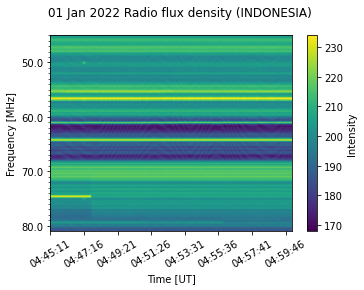

In [67]:
dp.plot()